# Text Analysis

**Project Title:** Healthcare Experience Trends Analysis from Press Ganey Blogs (2024-2025)

**Author:** Virginia Wenger

**Date:** 04.02.2025

**Description:** This notebook performs web scraping of Press Ganey's blog articles and applies text analytics to uncover recurring themes and emerging trends in healthcare experience measurement and improvement. The analysis focuses on identifying key themes such as technology integration, patient feedback, and workforce engagement.
    
**Methods Used:**
- Web Scraping (BeautifulSoup, Requests)
- Text Preprocessing (NLTK, Regular Expressions)
- N-gram Frequency Analysis
- Named Entity Recognition (NER) using SpaCy
- Topic Modeling using Latent Dirichlet Allocation (LDA)
- Sentiment Analysis (TextBlob and Transformer Models)
- Summarization using Transformer Models (T5-small)
- Data Visualization (Matplotlib, Seaborn)
    
**Outcome:**

The analysis highlights five key trends shaping healthcare experience measurement:
- AI & Technology Integration
- Patient-Centered Care
- Workforce Engagement & Safety
- Regulatory Standards
- Health Equity & Social Determinants


In [1]:
# Packages
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/virginiawenger/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/virginiawenger/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# Load the CSV with the scraped data
df = pd.read_csv('data/press_ganey_blog_articles.csv')

# Combine all content into one text column for analysis
all_text = ' '.join(df['content'].dropna().tolist())


## Text cleaning

In [8]:
# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s\']', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Apply text cleaning
cleaned_text = clean_text(all_text)

# Tokenize and remove stopwords
tokens = word_tokenize(cleaned_text)
filtered_tokens = [word for word in tokens if word not in stopwords.words('english') and len(word) > 2]

# Display sample tokens
print(filtered_tokens[:50])

['artificial', 'intelligence', 'revolutionizing', 'healthcare', 'landscape', 'speak', 'extraordinary', 'potential', 'streamline', 'processes', 'sharpen', 'decisionmaking', 'improve', 'efficiencies', 'becoming', 'increasingly', 'evident', 'impact', 'safety', 'leaders', 'exception', 'much', 'conversation', 'centered', 'around', 'rapid', 'technological', 'futuristic', 'innovations', 'profound', 'effects', 'may', 'also', 'seen', 'felt', 'daytoday', 'work', 'improving', 'patient', 'safety', 'improving', 'data', 'quality', 'empowering', 'safety', 'leaders', 'make', 'informed', 'decisions', 'anticipate']


## Keyword Frequency Analysis

[('healthcare', 359), ('patient', 319), ('safety', 225), ('experience', 225), ('care', 220), ('press', 174), ('health', 167), ('organizations', 153), ('patients', 132), ('data', 129), ('ganey', 124), ('workforce', 97), ('plans', 92), ('quality', 87), ('engagement', 81), ('also', 80), ('member', 80), ('survey', 80), ('consumer', 75), ('like', 74)]


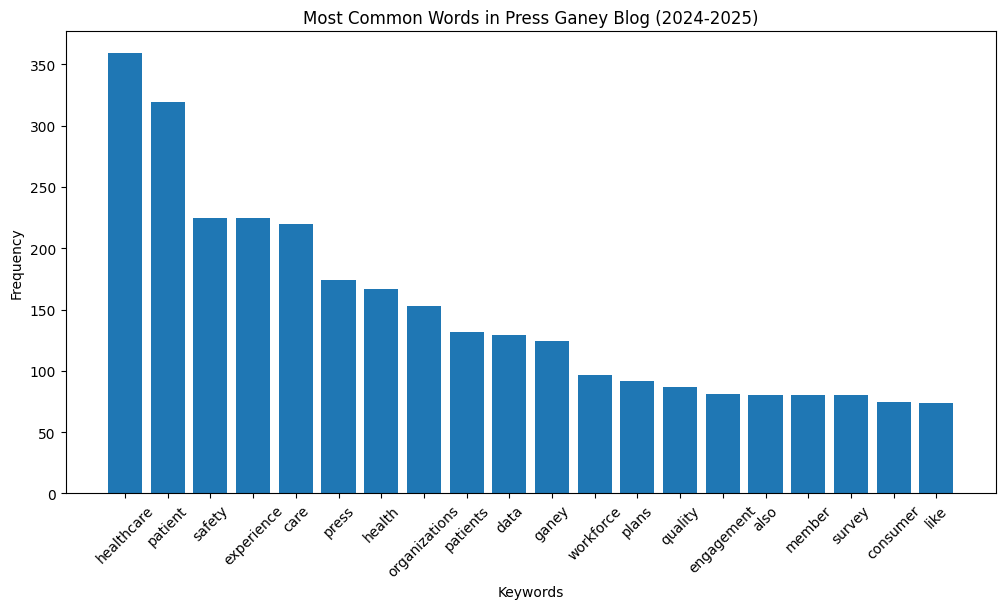

In [9]:
# Count the frequency of each word
word_freq = Counter(filtered_tokens)

# Display the 20 most common words
most_common_words = word_freq.most_common(20)
print(most_common_words)

# Visualize the most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Most Common Words in Press Ganey Blog (2024-2025)')
plt.xticks(rotation=45)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()

### Refine keyword search

[('engagement', 81), ('help', 73), ('improvement', 72), ('leaders', 71), ('improve', 69), ('improving', 65), ('work', 59), ('nursing', 54), ('cahps', 51), ('one', 50), ('ganeys', 49), ('medicare', 49), ('organization', 48), ('provider', 48), ('cms', 47), ('well', 47), ('star', 46), ('clinical', 45), ('including', 45), ('years', 45)]


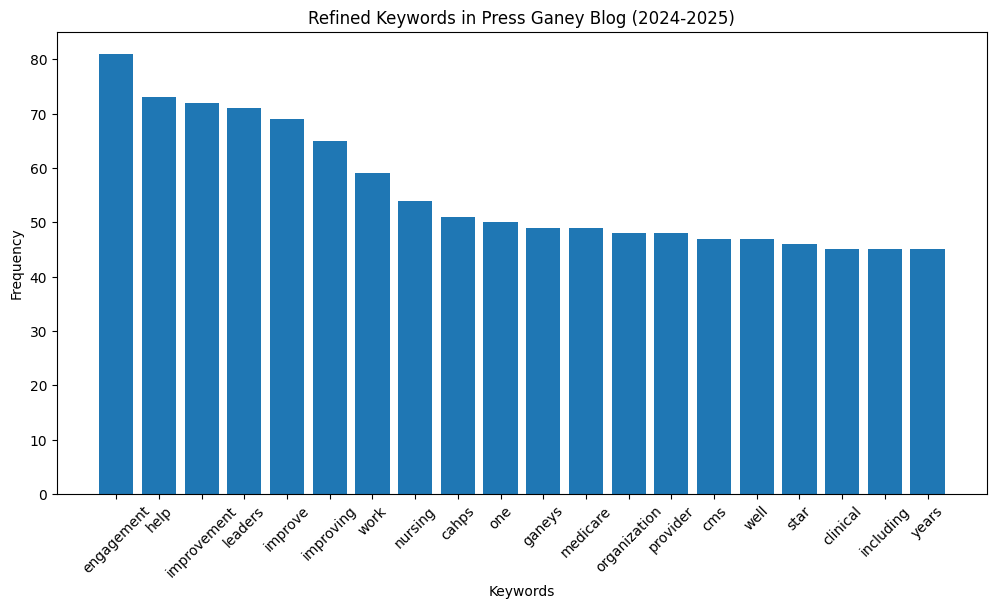

In [26]:
# Define custom stopwords to exclude common domain-specific terms
custom_stopwords = set([
    'healthcare', 'patient', 'safety', 'experience', 'care',
    'press', 'ganey', 'health', 'organizations', 'patients',
    'data', 'workforce', 'quality', 'survey', 'consumer',
    'like', 'plans', 'member', 'also', 'new', 'insights', 'outcomes', 'performance', 'know',
    'brand', 'key', 'across', 'better', 'email', 'stay', 'join', 'list', 'subscribe', 'now', 'read', 'blog'
])


# Filter out both standard stopwords and custom stopwords
filtered_tokens_refined = [word for word in filtered_tokens if word not in custom_stopwords]

# Recalculate word frequencies after custom filtering
word_freq_refined = Counter(filtered_tokens_refined)

# Display the 20 most common refined words
most_common_words_refined = word_freq_refined.most_common(20)
print(most_common_words_refined)

# Visualize the refined keywords
words, counts = zip(*most_common_words_refined)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.title('Refined Keywords in Press Ganey Blog (2024-2025)')
plt.xticks(rotation=45)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.show()

### Use N-grams to Identify Key Phrases

Top Bi-grams: [(('oas', 'cahps'), 30), (('medicare', 'advantage'), 27), (('star', 'ratings'), 27), (('high', 'reliability'), 20), (('employee', 'engagement'), 16), (('star', 'rating'), 15), (('best', 'practices'), 15), (('zero', 'harm'), 13), (('medicare', 'medicaid'), 11), (('chief', 'clinical'), 10), (('clinical', 'officer'), 10), (('social', 'capital'), 10), (('medicaid', 'services'), 10), (('vice', 'president'), 10), (('cms', 'star'), 10)]
Top Tri-grams: [(('chief', 'clinical', 'officer'), 10), (('medicare', 'medicaid', 'services'), 10), (('centers', 'medicare', 'medicaid'), 9), (('medicaid', 'services', 'cms'), 9), (('assessment', 'providers', 'systems'), 8), (('make', 'informed', 'decisions'), 7), (('senior', 'vice', 'president'), 7), (('chief', 'transformation', 'officer'), 6), (('transformation', 'officer', 'gandhi'), 6), (('officer', 'gandhi', 'mph'), 6), (('gandhi', 'mph', 'cpps'), 6), (('mph', 'cpps', 'responsible'), 6), (('cpps', 'responsible', 'improving'), 6), (('responsi

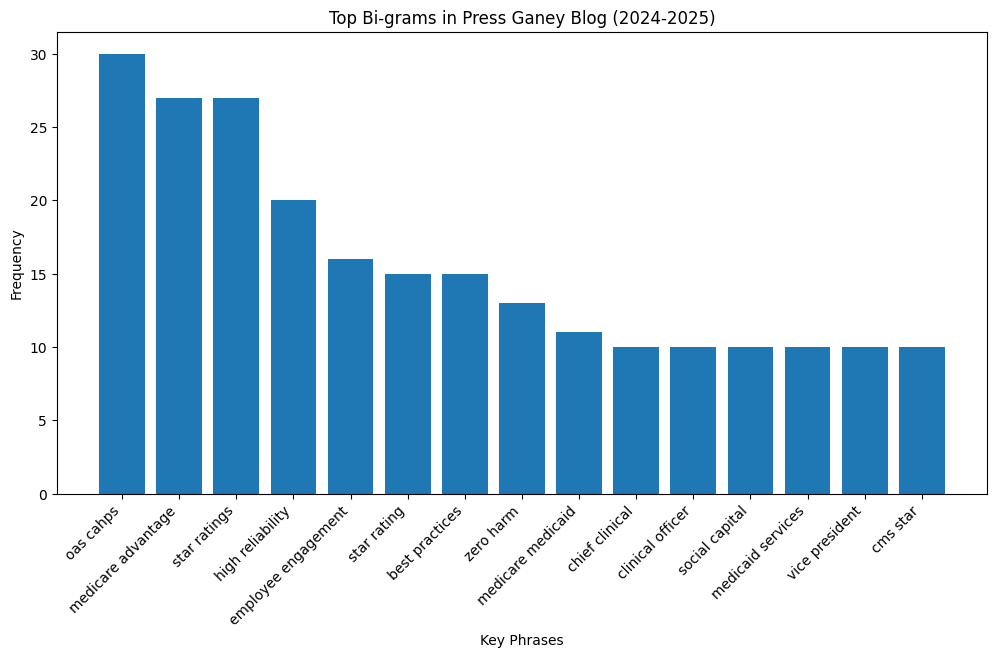

In [27]:
# Create bi-grams and tri-grams
bigrams = list(ngrams(filtered_tokens_refined, 2))
trigrams = list(ngrams(filtered_tokens_refined, 3))

# Calculate frequency of bi-grams
bigram_freq = Counter(bigrams).most_common(15)
print("Top Bi-grams:", bigram_freq)

# Calculate frequency of tri-grams
trigram_freq = Counter(trigrams).most_common(15)
print("Top Tri-grams:", trigram_freq)

# Visualize top bi-grams
bigram_labels = [' '.join(bigram) for bigram, count in bigram_freq]
bigram_counts = [count for bigram, count in bigram_freq]

plt.figure(figsize=(12, 6))
plt.bar(bigram_labels, bigram_counts)
plt.title('Top Bi-grams in Press Ganey Blog (2024-2025)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Key Phrases')
plt.ylabel('Frequency')
plt.show()

**Useful Insights Identified:**

_Medicare & Medicaid Focus:_

"Medicare Advantage", "Medicare Medicaid Services", "Centers Medicare Medicaid" suggest a focus on government healthcare programs. This may reflect Press Ganey’s work in compliance, policy impacts, or quality ratings tied to these programs.

_Quality & Performance Metrics:_

"Star ratings", "High reliability", "Best practices", and "Zero harm" point towards trends in healthcare quality improvement, reliability science, and safety standards. This suggests an emphasis on performance measurement and risk reduction in healthcare settings.

_Employee and Organizational Focus:_

"Employee engagement", "Social capital", and titles like "Chief Clinical Officer" indicate a focus on internal healthcare management, leadership roles, and staff well-being.

_Decision-Making & Data Use:_

"Make informed decisions" suggests trends in data-driven decision-making and evidence-based practices.

**What the Results Show:**

_Quality and Safety Metrics:_

"High reliability", "Star ratings", "Zero harm" point toward quality improvement and safety protocols in healthcare.These are central trends in Press Ganey’s work, emphasizing performance benchmarking and risk reduction.

_Policy and Compliance Focus:_

"Medicare Advantage", "Medicare Medicaid Services", "Centers Medicare Medicaid" suggest a strong focus on government healthcare programs and regulatory compliance. These terms often tie into federal performance metrics like CAHPS and HCAHPS.

_Organizational Focus:_

"Employee engagement" and "Social capital" indicate an internal focus on healthcare workforce well-being, which is often linked to better patient outcomes.

**What’s Missing:**

_Patient-Centric Trends:_

We don’t see enough about patient satisfaction, feedback mechanisms, or personalized care.

_Emerging Technologies:_

There’s little mention of AI, machine learning, or data-driven decision-making, which are increasingly relevant in healthcare.

### Use AI Models 

In [20]:
from transformers import pipeline

# Summarize the text block
text_block = ' '.join(df['content'].dropna().tolist())

# Load summarization model with PyTorch backend
summarizer = pipeline('summarization', model='t5-small', framework='pt')

def chunk_text(text, max_chunk_size=300):
    words = text.split()
    return [' '.join(words[i:i + max_chunk_size]) for i in range(0, len(words), max_chunk_size)]

# Split the text into smaller chunks
text_chunks = chunk_text(text_block)

# Verify the number of chunks
print(f"Total chunks created: {len(text_chunks)}")


Device set to use mps:0


Total chunks created: 116


In [21]:
# Summarize each text chunk
summaries = []
for idx, chunk in enumerate(text_chunks):
    print(f"Summarizing chunk {idx + 1} of {len(text_chunks)}...")
    summary = summarizer(chunk, max_length=150, min_length=50, do_sample=False)
    summaries.append(summary[0]['summary_text'])

# Combine all summaries into one final summary
final_summary = ' '.join(summaries)
print("\nFinal Healthcare Trends Summary:")
print(final_summary)


Summarizing chunk 1 of 116...
Summarizing chunk 2 of 116...
Summarizing chunk 3 of 116...
Summarizing chunk 4 of 116...
Summarizing chunk 5 of 116...
Summarizing chunk 6 of 116...
Summarizing chunk 7 of 116...
Summarizing chunk 8 of 116...
Summarizing chunk 9 of 116...
Summarizing chunk 10 of 116...
Summarizing chunk 11 of 116...
Summarizing chunk 12 of 116...
Summarizing chunk 13 of 116...
Summarizing chunk 14 of 116...
Summarizing chunk 15 of 116...
Summarizing chunk 16 of 116...
Summarizing chunk 17 of 116...
Summarizing chunk 18 of 116...
Summarizing chunk 19 of 116...
Summarizing chunk 20 of 116...
Summarizing chunk 21 of 116...
Summarizing chunk 22 of 116...
Summarizing chunk 23 of 116...
Summarizing chunk 24 of 116...
Summarizing chunk 25 of 116...
Summarizing chunk 26 of 116...
Summarizing chunk 27 of 116...
Summarizing chunk 28 of 116...
Summarizing chunk 29 of 116...
Summarizing chunk 30 of 116...
Summarizing chunk 31 of 116...
Summarizing chunk 32 of 116...
Summarizing chunk

In [29]:
summarizer = pipeline('summarization', model='facebook/bart-large-cnn', framework='pt')
# Summarize each text chunk
summaries2 = []
for idx, chunk in enumerate(text_chunks):
    print(f"Summarizing chunk {idx + 1} of {len(text_chunks)}...")
    summary2 = summarizer(chunk, max_length=150, min_length=50, do_sample=False)
    summaries2.append(summary2[0]['summary_text'])

# Combine all summaries into one final summary
final_summary2 = ' '.join(summaries2)
print("\nFinal Healthcare Trends Summary:")
print(final_summary2)

model.safetensors:  55%|#####5    | 902M/1.63G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.hf.co/facebook/bart-large-cnn/40041830399afb5348525ef8354b007ecec4286fdf3524f7e6b54377e17096cb?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1738625111&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczODYyNTExMX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9mYWNlYm9vay9iYXJ0LWxhcmdlLWNubi80MDA0MTgzMDM5OWFmYjUzNDg1MjVlZjgzNTRiMDA3ZWNlYzQyODZmZGYzNTI0ZjdlNmI1NDM3N2UxNzA5NmNiP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiJ9XX0_&Signature=cG2J1kMDEROcGKIuH41zGGJBkiR2NSxaSZ7BGYMejJuobezJ1JUagYQ5shgl9uUPqGEz%7ENzFFFKu-vn-LmnQJgvkOKW1FNGnAzupo3zmk86LMoxZNhvMW8ykHQN706EOpkWOpLhGlrE0X8p9MmxS0eWuiOhIY%7EZYSTqrbcqloAiJiZrDHbDaJJVyUkJq%7EnWQhMYIZ6HNQ8mfqWhYXi7PFC2X0m-O%7EqDZNvwSdjOc%7ENAASCefO88AexL28DExBknlL%7EkHU5lHXr08%7ESvcL%7EtOOY5V6NF1IiXAHVTtd5H46mGbDWj248D%7Eu%7ECl1Jv6BonGLdA9LtR9PF5SsrpFYs-B%7EA__&Key-Pair-Id=K3RPWS32NSSJCE:

model.safetensors:  88%|########7 | 1.43G/1.63G [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs.hf.co/facebook/bart-large-cnn/40041830399afb5348525ef8354b007ecec4286fdf3524f7e6b54377e17096cb?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model.safetensors%3B+filename%3D%22model.safetensors%22%3B&Expires=1738625111&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczODYyNTExMX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9mYWNlYm9vay9iYXJ0LWxhcmdlLWNubi80MDA0MTgzMDM5OWFmYjUzNDg1MjVlZjgzNTRiMDA3ZWNlYzQyODZmZGYzNTI0ZjdlNmI1NDM3N2UxNzA5NmNiP3Jlc3BvbnNlLWNvbnRlbnQtZGlzcG9zaXRpb249KiJ9XX0_&Signature=cG2J1kMDEROcGKIuH41zGGJBkiR2NSxaSZ7BGYMejJuobezJ1JUagYQ5shgl9uUPqGEz%7ENzFFFKu-vn-LmnQJgvkOKW1FNGnAzupo3zmk86LMoxZNhvMW8ykHQN706EOpkWOpLhGlrE0X8p9MmxS0eWuiOhIY%7EZYSTqrbcqloAiJiZrDHbDaJJVyUkJq%7EnWQhMYIZ6HNQ8mfqWhYXi7PFC2X0m-O%7EqDZNvwSdjOc%7ENAASCefO88AexL28DExBknlL%7EkHU5lHXr08%7ESvcL%7EtOOY5V6NF1IiXAHVTtd5H46mGbDWj248D%7Eu%7ECl1Jv6BonGLdA9LtR9PF5SsrpFYs-B%7EA__&Key-Pair-Id=K3RPWS32NSSJCE:

model.safetensors:  89%|########9 | 1.45G/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use mps:0


Summarizing chunk 1 of 116...


/Users/virginiawenger/.pyenv/versions/lewagon/lib/python3.10/site-packages/transformers/pytorch_utils.py:337: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_elements = torch.tensor(test_elements)


Summarizing chunk 2 of 116...
Summarizing chunk 3 of 116...
Summarizing chunk 4 of 116...
Summarizing chunk 5 of 116...
Summarizing chunk 6 of 116...
Summarizing chunk 7 of 116...
Summarizing chunk 8 of 116...
Summarizing chunk 9 of 116...
Summarizing chunk 10 of 116...
Summarizing chunk 11 of 116...
Summarizing chunk 12 of 116...
Summarizing chunk 13 of 116...
Summarizing chunk 14 of 116...
Summarizing chunk 15 of 116...
Summarizing chunk 16 of 116...
Summarizing chunk 17 of 116...
Summarizing chunk 18 of 116...
Summarizing chunk 19 of 116...
Summarizing chunk 20 of 116...
Summarizing chunk 21 of 116...
Summarizing chunk 22 of 116...
Summarizing chunk 23 of 116...
Summarizing chunk 24 of 116...
Summarizing chunk 25 of 116...
Summarizing chunk 26 of 116...
Summarizing chunk 27 of 116...
Summarizing chunk 28 of 116...
Summarizing chunk 29 of 116...
Summarizing chunk 30 of 116...
Summarizing chunk 31 of 116...
Summarizing chunk 32 of 116...
Summarizing chunk 33 of 116...
Summarizing chun

### Use Named Entity Recognition (NER) 

Top Named Entities: [('Press Ganey', 74), ('AI', 72), ('CMS', 48), ('NPS', 30), ('2025', 25), ('HOS', 25), ('Healthcare', 22), ('Medicare', 22), ('today', 22), ('OAS', 22), ('Google', 19), ('Gandhi', 18), ('CAHPS', 17), ('2024', 16), ('NDNQI', 14), ('Medicare Advantage', 13), ('Press Ganey’s', 13), ('Ganey', 13), ('IHI', 12), ('HHS', 12)]


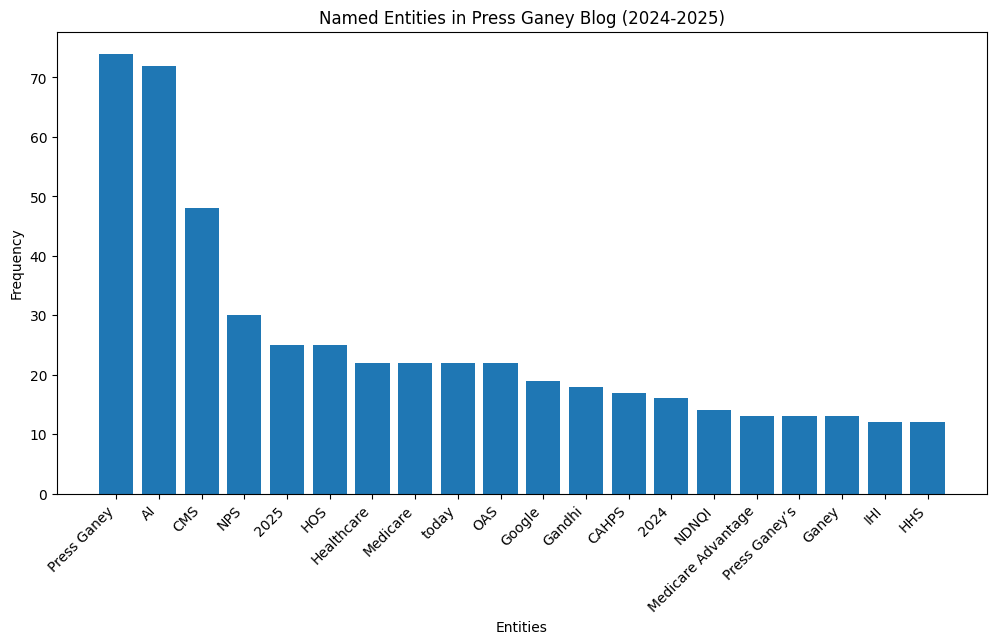

In [22]:
# Load spaCy's pre-trained model
nlp = spacy.load('en_core_web_sm')

# Process the text
doc = nlp(' '.join(df['content'].dropna().tolist()))

# Extract healthcare-specific entities
entities = [ent.text for ent in doc.ents if ent.label_ in ['ORG', 'GPE', 'DATE', 'PERSON', 'EVENT']]

# Display top entities
entity_freq = Counter(entities).most_common(20)
print("Top Named Entities:", entity_freq)

# Visualize entities
entity_labels, entity_counts = zip(*entity_freq)
plt.figure(figsize=(12, 6))
plt.bar(entity_labels, entity_counts)
plt.title('Named Entities in Press Ganey Blog (2024-2025)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Entities')
plt.ylabel('Frequency')
plt.show()


## Word Cloud Visualization

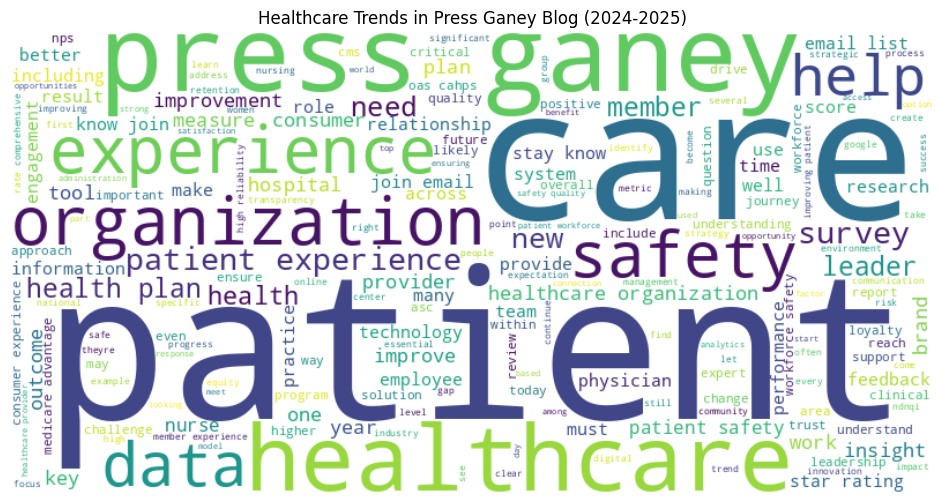

In [23]:
additional_stopwords = set(['healthcare', 'patient', 'press', 'ganey', 'care', 'experience'])
stopwords_set = set(stopwords.words('english')).union(additional_stopwords)

wordcloud = WordCloud(width=800, height=400, , stopwords=stopwords_set, background_color='white').generate(' '.join(filtered_tokens))

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Healthcare Trends in Press Ganey Blog (2024-2025)')
plt.show()

## Topic Modeling (LDA)

In [25]:
# Prepare data for LDA
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['content'].dropna())

# Apply LDA for topic modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"Top 10 words for Topic #{index + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")


Top 10 words for Topic #1:
['outcomes', 'managers', 'work', 'quality', 'environments', 'practice', 'nursing', 'nurses', 'environment', 'nurse']


Top 10 words for Topic #2:
['members', 'plan', 'medicare', 'star', 'quality', 'survey', 'experience', 'member', 'plans', 'health']


Top 10 words for Topic #3:
['community', 'turnover', 'survey', 'oas', 'feedback', 'cahps', 'patients', 'organizations', 'engagement', 'experience']


Top 10 words for Topic #4:
['like', 'provider', 'organizations', 'nps', 'search', 'ai', 'consumers', 'brand', 'consumer', 'experience']


Top 10 words for Topic #5:
['high', 'harm', 'help', 'health', 'work', 'patients', 'organizations', 'ai', 'workforce', 'safety']




# Findings

**1. Patient-Centered Care and Experience:** 
A strong emphasis on improving patient experiences was evident throughout the blog content, focusing on both in-patient and out-patient settings. Specific attention was given to new survey methodologies like the OAS CAHPS survey, which is becoming a mandatory quality measure in 2025, indicating a trend towards more structured patient feedback mechanisms.

**2. AI and Technology Integration in Healthcare:** 
Multiple articles highlighted the role of AI in healthcare, specifically in patient safety, event detection, and decision-making processes. Terms like "high reliability" and "zero harm" suggest a focus on integrating technology to minimize errors and enhance care quality.

**3. Workforce Engagement and Safety:** 
The concept of employee engagement appeared frequently, pointing towards a growing focus on not only patient but also healthcare worker satisfaction and safety. This aligns with broader trends in healthcare emphasizing holistic well-being within organizations.

**4. Regulatory and Quality Standards:** 
The Medicare Advantage program and Star Ratings were recurring topics, reflecting the industry's preoccupation with regulatory compliance and the pursuit of high-quality ratings as markers of excellence.

**5. Health Equity and Social Determinants:** 
References to social capital and discussions around health equity suggest an increasing focus on addressing broader social determinants of health, aiming for inclusive and fair healthcare practices.

## Count Keyword Frequency Across Blog Posts

In [31]:
# Define keywords for each trend
trends = {
    'Patient-Centered Care': ['patient experience', 'patient-centered', 'care quality', 'survey', 'feedback'],
    'AI & Technology Integration': ['AI', 'artificial intelligence', 'machine learning', 'predictive analytics', 'technology'],
    'Workforce Engagement': ['employee engagement', 'workforce safety', 'staff well-being', 'burnout'],
    'Regulatory Standards': ['Medicare Advantage', 'Star Ratings', 'compliance', 'OAS CAHPS', 'regulation'],
    'Health Equity': ['health equity', 'social determinants', 'inclusion', 'diversity', 'disparities']
}

# Function to count trend occurrences
def count_trends(text, trend_keywords):
    text = text.lower()
    return sum(text.count(keyword.lower()) for keyword in trend_keywords)

# Apply to each blog post and sum counts
trend_counts = {trend: df['content'].apply(lambda x: count_trends(str(x), keywords)).sum() for trend, keywords in trends.items()}

# Display the trend counts
print(trend_counts)

{'Patient-Centered Care': 253, 'AI & Technology Integration': 470, 'Workforce Engagement': 55, 'Regulatory Standards': 105, 'Health Equity': 34}


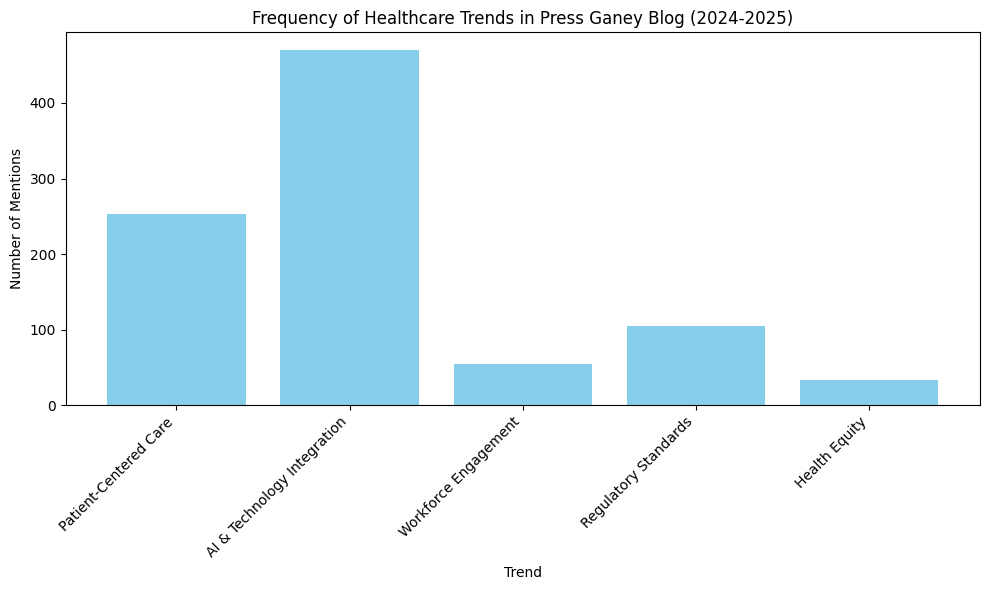

In [32]:
import matplotlib.pyplot as plt

# Convert to DataFrame for easy plotting
import pandas as pd
trend_df = pd.DataFrame(list(trend_counts.items()), columns=['Trend', 'Count'])

# Plotting the trend frequencies
plt.figure(figsize=(10, 6))
plt.bar(trend_df['Trend'], trend_df['Count'], color='skyblue')
plt.title('Frequency of Healthcare Trends in Press Ganey Blog (2024-2025)')
plt.xlabel('Trend')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
